# Classical Electrodynamics - Problem Set 3

## Dimitris Kourtesis - Subatomic Physics Masters

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from rcparams import rcparams
mpl.rcParams.update(rcparams)

### Example 3.1 (a):

The surface-charge density induced on an infinite plane conductor held at zero potential by a point charge $q$ brought to a distance $d$ away from the the plane was calculated to be

$$\sigma=-\frac{qd}{2\pi\left(x^2+y^2+d^2\right)^{3/2}}=-\frac{qd}{2\pi(r^2+d^2)^{3/2}},\quad r\equiv\sqrt{x^2+y^2}$$

Below a 3D surface plot, a 2D contour and a radial profile plot for $\sigma(r)$ are presented, in order to fully visualise the properties of $\sigma$.

In [2]:
# --- parameters ---
q = 1.0   # charge (arbitrary units)
d = 1.0   # distance from plane



In [3]:
# --- physical parameters ---
q = 1.0   # point charge (arbitrary units)
d = 1.0   # distance from plane

# --- define functions ---
def sigma_xy(x, y, q=q, d=d):
    """Induced surface charge density σ(x, y)"""
    return -q * d / (2 * np.pi * (x**2 + y**2 + d**2)**1.5)

def sigma_r(r, q=q, d=d):
    """Radial profile σ(r)"""
    return -q * d / (2 * np.pi * (r**2 + d**2)**1.5)

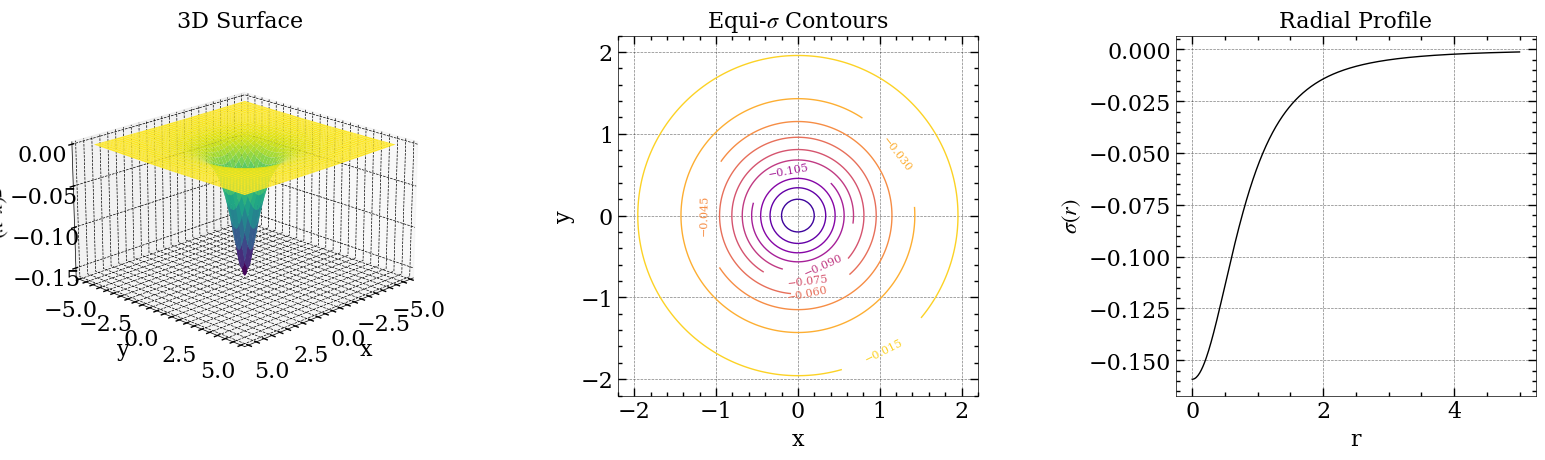

In [4]:
# --- grid for 2D/3D plots ---
x = np.linspace(-5, 5, 300)
y = np.linspace(-5, 5, 300)
X, Y = np.meshgrid(x, y)
Z = sigma_xy(X, Y)

# --- radial data ---
r = np.linspace(0, 5, 400)
Zr = sigma_r(r)

# --- create figure with 3 subplots in one row ---
fig = plt.figure(figsize=(18, 5))

# --- uniform panel geometry ---
panel_w = 0.26        # slightly reduced to balance internal padding
panel_h = 0.72        # identical height for all panels
bottom  = 0.16
lefts   = [0.06, 0.37, 0.68]  # keep your spacing layout

# (1) 3D surface plot
ax1 = fig.add_axes([lefts[0], bottom, panel_w, panel_h], projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, antialiased=True)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel(r"$\sigma(x,y)$", labelpad=10)
ax1.zaxis.label.set_rotation(0)
ax1.zaxis.label.set_verticalalignment('bottom')
ax1.zaxis.label.set_horizontalalignment('center')
ax1.zaxis.set_label_coords(0.5, 1.05)
ax1.set_title('3D Surface')
ax1.view_init(elev=20, azim=45)
ax1.set_box_aspect((1, 1, 0.6))

# (2) 2D contour plot (equi-σ lines)
ax2 = fig.add_axes([lefts[1], bottom, panel_w, panel_h])
contours = ax2.contour(X, Y, Z, levels=10, cmap='plasma')
ax2.clabel(contours, inline=True, fontsize=8)
ax2.set_xlabel('x') ; ax2.set_ylabel('y')
ax2.set_title(r'Equi-$\sigma$ Contours')
ax2.set_aspect('equal', adjustable='box')
ax2.set_xlim(-2.2, 2.2) ; ax2.set_ylim(-2.2, 2.2)

# (3) Radial profile plot
ax3 = fig.add_axes([lefts[2], bottom, panel_w, panel_h])
ax3.plot(r, Zr, color="black")
ax3.set_xlabel('r') ; ax3.set_ylabel(r'$\sigma(r)$')
ax3.set_title('Radial Profile')
ax3.grid(True)
ax3.set_box_aspect(1.0)  # ensures same vertical-to-horizontal ratio as others

# --- force consistent scaling across figure ---
# no subplots_adjust here (fig.add_axes ignores it)
# we instead ensure the bounding boxes are all identical
for ax in [ax1, ax2, ax3]:
    pos = ax.get_position()
    ax.set_position([pos.x0, bottom, panel_w, panel_h])

# --- save/export ---
plt.savefig("sigma_visualization.pdf", bbox_inches="tight", pad_inches=0.5)
plt.show()

### Exercise 3.3 (b):

A straight-line charge with constant linear charge-density $\lambda$ is located perpendicular to the $x-y$ plane in the first quadrant at $(x_{0},y_{0})$. The intersecting planes $x=0$,$y\geq 0$ and $y=0$, $x\geq 0$ are conducting boundary surfaces held at zero potential. Consider the potential, fields, and surface charges in the first quadrant.

The resulting surface charge density, using an image charge approach, was calculated to be

$$\frac{\sigma}{\lambda}=-\frac{y_0}{\pi}\left[\frac{1}{(x-x_0)^2+y_0^2}-\frac{1}{(x+x_0)^2+y_0^2} \right]$$

Below, a similar approach to the one before will be used to represent the surface charge density in the cases that the initial line charge is place at $(x_{0}=2,y_{0}=1)$, $(x_{0}=1,y_{0}=1)$, and $(x_{0}=1,y_{0}=2)$, respectively.

In [5]:
# --- constants ---
lambda0 = 1.0  # linear charge density (arbitrary units)

# --- surface charge density function ---
def sigma_xy(x, y, x0, y0, lam=lambda0):
    """
    Returns σ/λ for given x, y and line-charge position (x0, y0).
    """
    return -(y0/np.pi) * (
        1 / ((x - x0)**2 + y0**2) -
        1 / ((x + x0)**2 + y0**2)
    )

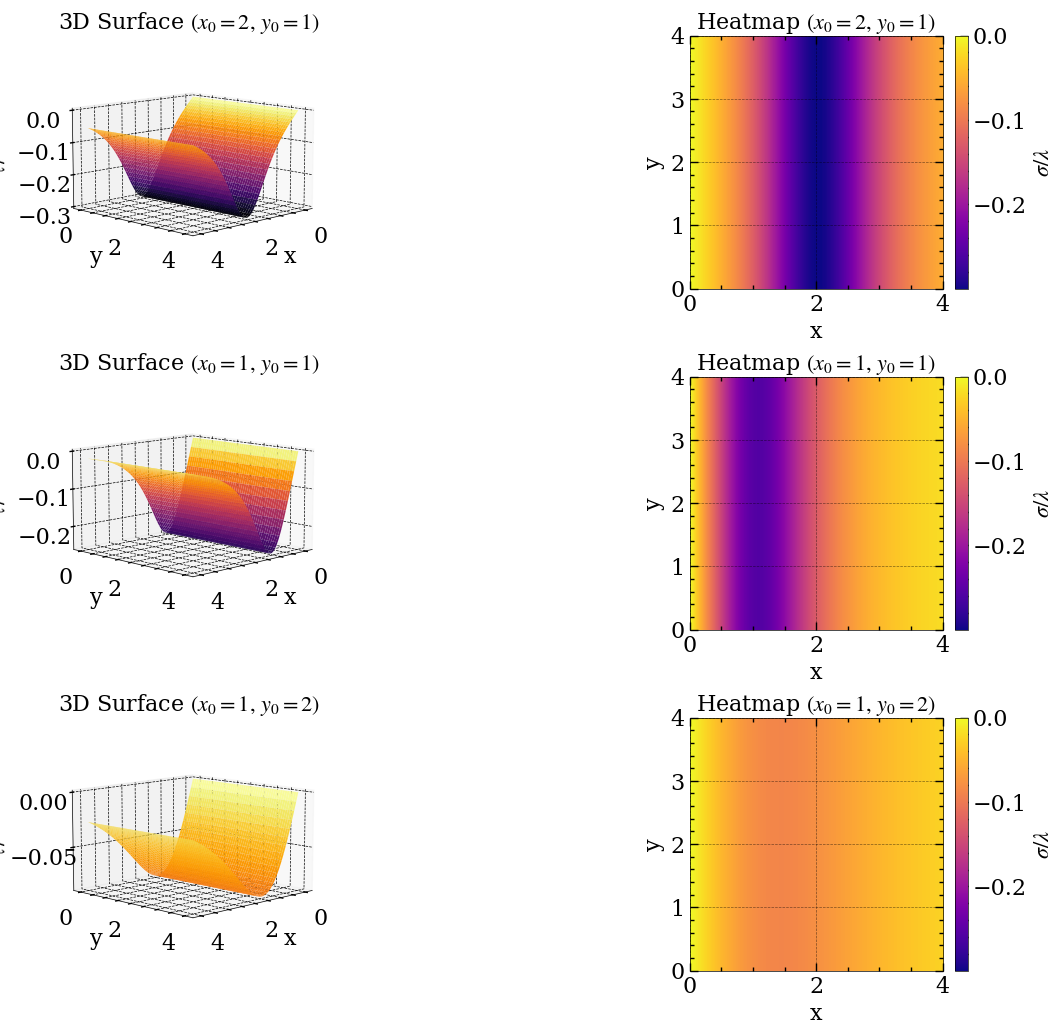

In [6]:
# --- grid ---
x = np.linspace(0, 4, 300)
y = np.linspace(0, 4, 300)
X, Y = np.meshgrid(x, y)
configs = [(2, 1), (1, 1), (1, 2)]

# --- precompute data and global limits for consistent color scale ---
Z_list = [sigma_xy(X, Y, x0, y0) for (x0, y0) in configs]
Zmin = min(Z.min() for Z in Z_list)
Zmax = max(Z.max() for Z in Z_list)

# --- figure layout ---
fig = plt.figure(figsize=(13, 11))  # slightly wider and taller
panel_w = 0.24
panel_h = 0.23                      # a bit shorter so labels fit inside
lefts = [0.08, 0.56]                # spacing between columns
bottoms = [0.70, 0.39, 0.08]        # vertical spacing between rows

for i, ((x0, y0), Z) in enumerate(zip(configs, Z_list)):
    # --- 3D surface ---
    ax_surf = fig.add_axes([lefts[0], bottoms[i], panel_w, panel_h], projection='3d')
    surf = ax_surf.plot_surface(
        X, Y, Z, cmap='inferno', vmin=Zmin, vmax=Zmax, linewidth=0, antialiased=True
    )
    ax_surf.set_xlabel('x')
    ax_surf.set_ylabel('y')
    ax_surf.set_zlabel(r'$\sigma/\lambda$', rotation=0, labelpad=10)
    ax_surf.zaxis.label.set_rotation(0)
    ax_surf.zaxis.set_label_coords(0.5, 1.05)
    ax_surf.set_title(fr'3D Surface $(x_0={x0},\,y_0={y0})$', pad=4)
    ax_surf.view_init(elev=10, azim=45)
    ax_surf.set_box_aspect((1, 1, 0.6))

    # --- Heatmap ---
    ax_heat = fig.add_axes([lefts[1], bottoms[i], panel_w, panel_h])
    im = ax_heat.imshow(
        Z, extent=[0, 4, 0, 4], origin='lower', cmap='plasma',
        vmin=Zmin, vmax=Zmax, aspect='equal'
    )
    ax_heat.set_xlabel('x')
    ax_heat.set_ylabel('y')
    ax_heat.set_title(fr'Heatmap $(x_0={x0},\,y_0={y0})$', pad=4)

    # --- Compact colorbar ---
    cbar = fig.colorbar(im, ax=ax_heat, fraction=0.046, pad=0.04)
    cbar.set_label(r'$\sigma/\lambda$')

# --- safe export: ensures all text is included ---
plt.savefig("sigma_linecharge.pdf", bbox_inches="tight", pad_inches=0.5)
plt.show()

### Exercise 3.4 (a):

A point charge is placed a distance $d>R$ from the center of an equally charged, isolated, conducting sphere of radius $R$.

A calculation for the point where the force vanishes resulting in an equilibrium, lead to the numerical equation

$$\mu^5-2\mu^3-2\mu^2+\mu+1=0,\quad\mu\equiv\frac{d}{R}$$

Below, a solution for the value of $\mu$ that satisfies the equation is computed using the Newton-Raphson method.

In [7]:
# f(μ) = μ^5 − 2μ^3 − 2μ^2 + μ + 1
def f(mu):
    return mu**5 - 2*mu**3 - 2*mu**2 + mu + 1

# f'(μ) = 5μ^4 − 6μ^2 − 4μ + 1
def df(mu):
    return 5*mu**4 - 6*mu**2 - 4*mu + 1

def newton(mu0, tol=1e-12, maxiter=100, dtol=1e-14):
    """
    Newton-Raphson for a single initial guess mu0.
    dtol: safeguard for tiny derivatives to avoid division by ~0.
    Returns (root, converged, iters).
    """
    mu = float(mu0)
    for k in range(1, maxiter+1):
        d = df(mu)
        if abs(d) < dtol:
            return mu, False, k
        step = f(mu)/d
        mu -= step
        if abs(step) < tol:
            return mu, True, k
    return mu, False, maxiter

def unique_roots(roots, tol=1e-8):
    """Cluster nearly-equal roots."""
    roots = np.array(sorted(roots))
    uniq = []
    for r in roots:
        if not uniq or abs(r - uniq[-1]) > tol:
            uniq.append(r)
    return np.array(uniq)

In [8]:
# choose a spread of initial guesses; adjust as you like
seeds = np.linspace(-3, 3, 25)

found = []
report = []
for s in seeds:
    r, ok, k = newton(s)
    if ok:
        found.append(r)
        report.append((s, r, k, f(r)))
    else:
        report.append((s, np.nan, k, np.nan))

# cluster numerically-equal roots
roots = unique_roots(found, tol=1e-8)

# print summary
print("Distinct real roots (Newton):")
for i, r in enumerate(roots, 1):
    print(f"  root {i}: μ = {r:.15g},  f(μ) = {f(r):.3e}")

Distinct real roots (Newton):
  root 1: μ = -0.618033988749895,  f(μ) = 0.000e+00
  root 2: μ = 0.754877666246693,  f(μ) = 0.000e+00
  root 3: μ = 1.61803398874989,  f(μ) = -1.110e-15


We only care for real positive solutions $\mu>1$, since $d>R$, hence the only solution that has a physical meaning is $\mu\cong 1.618$. We expect, based on the analysis provided on the text, that $\mu\to 1$ leads to an increasingly attracting () force, while $\mu\to\infty$ leads to an increasingly repuslive () force.

We verify this visually, by writing the force field in terms of $\mu$ so as to reassure that the qualitative analysis

$$F(\mu) / F_{0}=\left[-\frac{\mu}{(\mu^2-1)^2}+\frac{\mu^2+\mu}{\mu^4}\right],\quad F_{0}\equiv \frac{q}{4\pi\epsilon_0 R^2}$$

and plot for $\mu\in(1,\infty)$.

In [9]:
def F_normalised(mu):
    return - mu / (mu**2 - 1)**2 + (mu**2 + mu) / mu**4

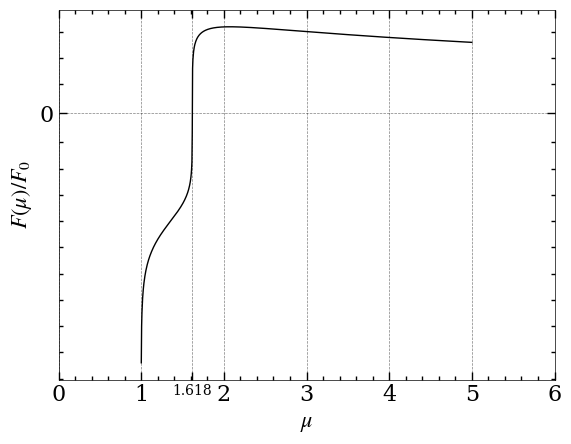

In [10]:
# Define μ range (start slightly above 1 to avoid singularity)
mu = np.linspace(1.001, 5, 1000)  # Adjust upper limit as desired

# Compute F(μ)
F = F_normalised(mu)

# Plot
plt.plot(mu, F, color="black")
plt.xlabel(r'$\mu$')
plt.ylabel(r'$F(\mu)/F_{0}$')
plt.yscale('symlog', linthresh=1e-3)
plt.yticks([0], ['0'])
locs, labels = plt.xticks()
plt.xticks(list(locs) + [1.61803398874989],
           [label.get_text() for label in labels] + ['1.618'])
plt.gcf().canvas.draw()  # ensure labels exist
for lab in plt.gca().get_xticklabels():
    if lab.get_text().startswith('1.618'):
        lab.set_fontsize(10)
        break
plt.savefig("force_field_3.png", dpi=200)
plt.show()